In [1]:
"""
通过可视化展示基于二进制哈希码进行图像检索的结果。
具体来说，它从保存的哈希码和标签中加载数据，选择一些查询图像，并展示检索到的最近邻图像以及它们与查询图像的相似性。
"""

import numpy as np
from PIL import Image, ImageOps
from matplotlib import pyplot as plt

In [2]:
def CalcHammingDist(B1, B2):
    q = B2.shape[1]
    distH = 0.5 * (q - np.dot(B1, B2.transpose()))
    return distH

In [3]:
# 从指定目录加载训练集和测试集的二进制哈希码和标签。
# 从图像路径文件中读取训练集和测试集的图像路径。
data_dir = ".././save/ResNet/NUSWIDE_48/nuswide_21_48bits_0.8552888702552874/"
trn_binary = np.load(data_dir + "trn_binary.npy")
trn_label = np.load(data_dir + "trn_label.npy")
tst_binary = np.load(data_dir + "tst_binary.npy")
tst_label = np.load(data_dir + "tst_label.npy")

img_dir = ".././datasets/NUS-WIDE/"
with open(".././data/nuswide_21/database.txt", "r") as f:
    trn_img_path = [img_dir + item.split(" ")[0] for item in f.readlines()]
with open("./../data/nuswide_21/test.txt", "r") as f:
    tst_img_path = [img_dir + item.split(" ")[0] for item in f.readlines()]


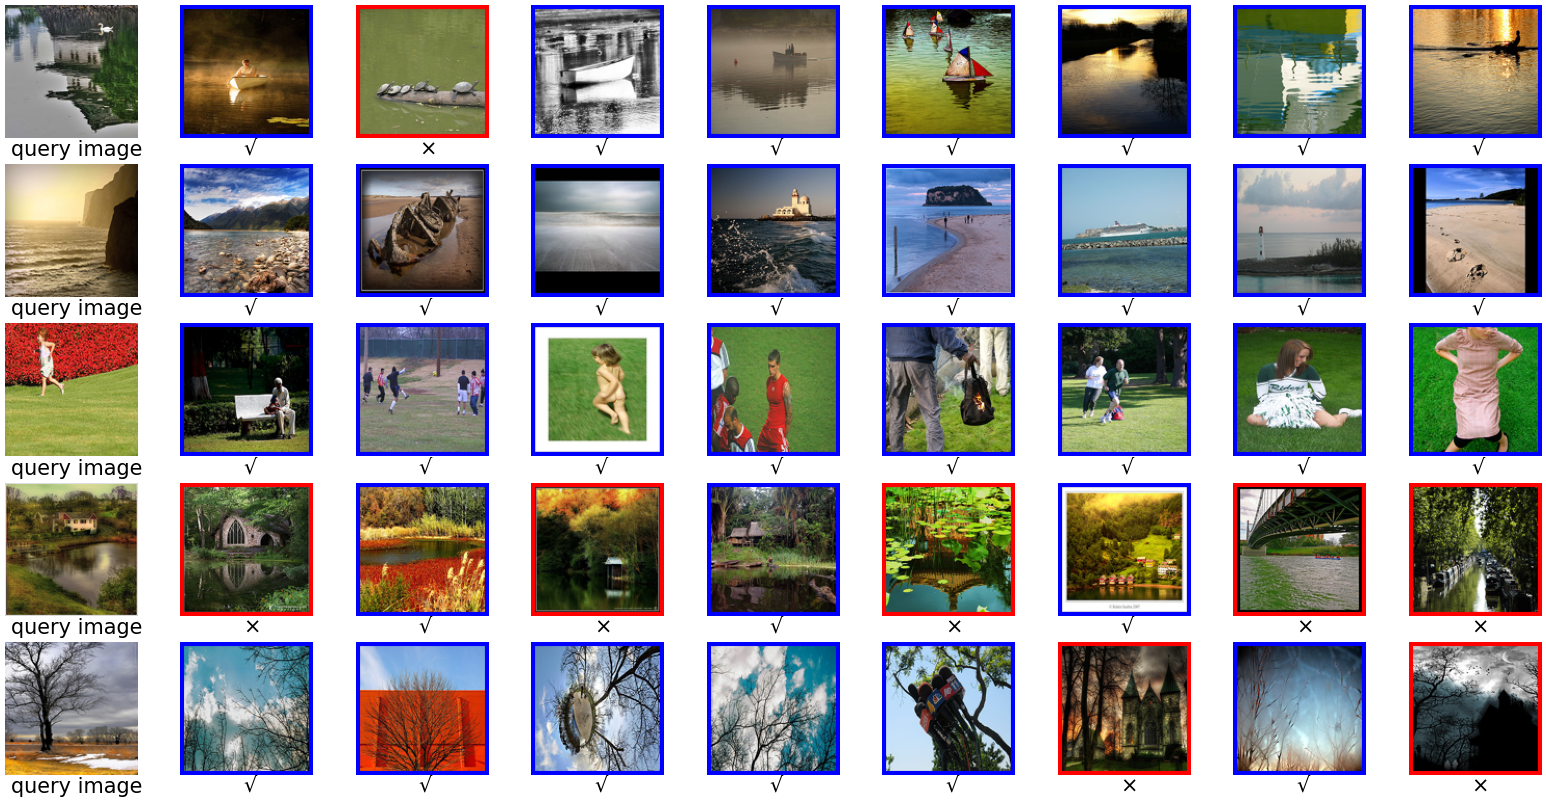

In [4]:
# 设置可视化参数：m 表示查询图像的数量，n 表示每个查询图像的最近邻数量。
# 创建一个画布，并设置图像的大小和分辨率。
# 随机选择 m 个测试样本作为查询图像。
m = 5
n = 8
plt.figure(figsize=(40, 20), dpi=50)
font_size = 30
tst_select_index = np.random.permutation(range(tst_binary.shape[0]))[0: m]

# 可视化查询和检索结果
for row, query_index in enumerate(tst_select_index):

    # 计算查询图像与训练集中所有图像标签的点积，得到 gnd，表示相关性。
    # 计算查询图像与训练集中所有图像的汉明距离。
    # 根据汉明距离排序，取前 n 个最近邻的索引。
    query_binary = tst_binary[query_index]
    query_label = tst_label[query_index]
    # 计算测试集和检索是否相似
    gnd = (np.dot(query_label, trn_label.transpose()) > 0).astype(np.float32)
    # 通过哈希码计算汉明距离
    hamm = CalcHammingDist(query_binary, trn_binary)
    # 计算最近的n个距离的索引
    ind = np.argsort(hamm)[:n]
    # 返回结果的真值
    t_gnd = gnd[ind]
    # 返回结果的汉明距离
    q_hamm = hamm[ind].astype(int)

    q_img_path = tst_img_path[query_index]
    return_img_list = np.array(trn_img_path)[ind].tolist()


    # 显示查询图像。
    # 显示检索结果图像，并根据其与查询图像的相关性，标注 √ 或 ×，并用不同颜色框表示相关性。
    plt.subplot(m, n + 1, row * (n+1) + 1)

    img = Image.open(q_img_path).convert('RGB').resize((128, 128))
    plt.imshow(img)
    plt.axis('off')
    plt.text(5, 145, 'query image', size=font_size)

    for index, img_path in enumerate(return_img_list):
        # plt.subplot(1, n + 1, index + 2)
        plt.subplot(m, n + 1, row * (n+1) + index + 2)
        img = Image.open(img_path).convert('RGB').resize((120, 120))
        if t_gnd[index]:
            plt.text(60, 145, '√', size=font_size)
            img = ImageOps.expand(img, 4, fill=(0, 0, 255))
        else:
            plt.text(60, 145, '×', size=font_size)
            img = ImageOps.expand(img, 4, fill=(255, 0, 0))
        plt.axis('off')
        plt.imshow(img)
plt.savefig("demo_NUSWIDE.png")
plt.show()
